In [2]:
import pandas as pd
#df = pd.DataFrame()
#query = []
#query.append('female extremely tired')
#query.append('male headache tired.')
#df['Query'] = query

In [3]:
df =  pd.read_pickle('/home/ubuntu/pha/dc_queries_df')
print('done')

done


In [3]:
df

,Query,QID
0,ØªÙ†Ø§ÙˆÙ„Øª (Ø§Ù†Ø¯Ø±Ø§Ù„ 40) ÙˆØ¨Ø¹Ø¯ Ø§Ù„Øª...,7767
1,can I remove pigmentation on face,7766
2,What kind of food i want to intake more fir gi...,7765
3,i am 30 years old my semen has some sperm whic...,7764
4,"I am male 17,from last few days its getting to...",7763
5,I am femel 2 -6 our mouth fungal what i do,7762
6,I need help,7761
7,redish pimple on penis,7760
8,I have very hard and fast heart beat after bre...,7759
9,I am female 33 yrs i have pimples for several ...,7758


In [10]:
#reading the embedding file
import numpy as np
embeddings_index ={}# It is a dictionary
f = open('/home/ubuntu/downloads/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('done')


#Frequency count
df_dic = pd.read_pickle('usual_words')
word_list = df_dic['spell'].tolist()
#There has to be one way to convert 
count_list = df_dic['count'].tolist()
word_dic ={}
for k, value in enumerate(word_list):
    word_dic[value] = count_list[k]
print('done')

done
done


In [5]:
#Tokenising and ready for input
import numpy as np
import re
sentences = df['Query'].tolist()
#Keras accepts numpy arrays as array of lists and array of arrays
sentences_tokenised =[]
sentence_len =[]
spell_check={}
correct ={}
max_val =-1
for sentence in sentences:
    sentence_tmp_tmp = []
    sentence = sentence.replace("\n"," ").replace("&amp;", " ").replace("&#039;", " ").replace("&lt;", " ").replace("&gt;", " ").replace("&quot;", " ").lower()
    sentence = re.sub('[\']+', '\'', sentence)
    sentence = re.sub('[-]+', '-', sentence)
    rules_applied = []            
    pattern = re.compile("(?P<ENCLOSED>(\'.*\'))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "1" not in rules_applied:
                    rules_applied.append("1")
        enclosed_word = match.group('ENCLOSED')
        sentence.replace(enclosed_word, enclosed_word.strip("'"))
    pattern = re.compile("(?P<ENCLOSED>(\".*\"))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "1" not in rules_applied:
            rules_applied.append("1")
        enclosed_word = match.group('ENCLOSED')
        sentence.replace(enclosed_word, enclosed_word.strip("\""))
    if bool(re.search(r'[a-z]', sentence)) == True:
        if  "2" not in rules_applied:
            rules_applied.append("2")                                                 
        sentence = re.sub('[^A-Za-z0-9\'-]+', ' ', sentence)
            
    if("please" in sentence or "plz" in sentence):
        sentence = re.sub('pl[z]+', '', sentence)
        sentence = re.sub('please, ', '', sentence)
        if  "3" not in rules_applied:
            rules_applied.append("3")
    pattern = re.compile("(?P<SEE>(?P<PRE_C>[ ]+(\D+)[ ]+[c][ ]+))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "5" not in rules_applied:
            rules_applied.append("5")
        pre_c = match.group('PRE_C')
        if pre_c is not "vitamin":
            enclosed_word = match.group('SEE')
            sentence = sentence.replace(enclosed_word, "see")
    pattern = re.compile("(?P<THE>([ ]+[d][ ]+))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "5" not in rules_applied:
            rules_applied.append("5")
        enclosed_word = match.group('THE')
        sentence = sentence.replace(enclosed_word, "the")
    pattern = re.compile("(?P<ARE>([ ]+[r][ ]+))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "5" not in rules_applied:
            rules_applied.append("5")
        enclosed_word = match.group('ARE')
        sentence = sentence.replace(enclosed_word, "are")
    pattern = re.compile("(?P<AM>([ ]+[m][ ]+))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "5" not in rules_applied:
            rules_applied.append("5")
        enclosed_word = match.group('AM')
        sentence = sentence.replace(enclosed_word, "m")
    pattern = re.compile("(?P<MONTHS>([0-9]+[ ]*[m][ ]+))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "5" not in rules_applied:
            rules_applied.append("5")
        enclosed_word = match.group('MONTHS')
        sentence = sentence.replace("m", "months")
    pattern = re.compile("(?P<YEAR>([0-9]+[ ]*[y][ ]+))")
    matches = pattern.finditer(sentence)
    for match in matches:
        if  "5" not in rules_applied:
            rules_applied.append("5")
        enclosed_word = match.group('YEAR')
        sentence = sentence.replace("y", "year")
    pattern = re.compile("(?P<NUM>([0-9]+))")
    matches = pattern.finditer(sentence)
    if bool(re.search(r'\S*\d\S*', sentence)) == True:
        if  "6" not in rules_applied:
            rules_applied.append("6")
        sentence = re.sub("\S*\d\S*", " * ", sentence).strip()
            
    sentence = ' '.join(sentence.split())
    sentence_tmp =  sentence.split(' ')
    for i in sentence_tmp:
        try:
            tmp = embeddings_index[i]
            if  i != '*' and bool(re.search(r'\d', i)) == False:
                sentence_tmp_tmp.append(i)
                try:
                    correct[i] = correct[i] +1
                except:
                    correct[i] = 1
        except:
            try:
                spell_check[i] = spell_check[i] +1
            except:
                spell_check[i] = 1
            pass
    sentences_tokenised.append(sentence_tmp_tmp)
    sentence_len.append(len(sentence_tmp_tmp))
    if max_val < len(sentence_tmp_tmp):
        max_val = len(sentence_tmp_tmp)
sentences_tokenised = np.array(sentences_tokenised)
#del sentences
print(max_val,'done')
#Also create a remove list and when you find it remove it
df['tokens'] = sentences_tokenised
df['len'] = sentence_len
#del sentences_tokenised
#del sentence_len

54 done


In [6]:
index_df = df.index.get_values()
df['row_id'] = index_df

In [7]:
#Creating input data set
#Filtered the len < 2
max_val=62
df_n=df[df['len'] > 2]
index_df_n = df_n.index.get_values()
#------------part 1
vec_list1 = df_n['tokens'].tolist()
sentence_numpied1 = np.zeros((len(df_n),max_val,100))
for i,sentence in enumerate(vec_list1):
    for j, word in enumerate(sentence):
        sentence_numpied1[i][j] =  embeddings_index[word]
print('done')

done


In [8]:
sentence_numpied1 = sentence_numpied1.reshape(len(df_n),max_val,100,1)

In [9]:
#building the model in Keras with 2 models sharing the weights

from keras.layers import Input, Convolution2D, Dense, merge, Flatten, Dropout, MaxPooling2D, Input
from keras.models import Model

pool_size = (2, 1)
max_val=62
# convolution kernel size
nb_filters = 1200
kernel_size1 = (2, 100)
kernel_size2 = (2, 1)
print('start...')
#Building the first model
img1 = Input(shape=(max_val, 100,1))#Just the shape matters hence addition of 1 
img2 = Input(shape=(max_val, 100,1))#Just the shape matters hence addition of 1 

#Defining the convolution shared layer------ input
shared_conv1=Convolution2D(nb_filters, kernel_size1[0], kernel_size1[1],
                        border_mode='valid',activation='relu')
#Creating input pipeline
img1_layer1 = shared_conv1(img1)
img2_layer1 = shared_conv1(img2)

#Defining the convolution shared layer------ gates
shared_conv2=Convolution2D(nb_filters, kernel_size1[0], kernel_size1[1],
                        border_mode='valid',activation='sigmoid')
#Creating input pipeline
img1_layer2 = shared_conv2(img1)
img2_layer2 = shared_conv2(img2)

# merged layer
img1_layer3 = merge([img1_layer1, img1_layer2], mode='mul')
img2_layer3 = merge([img2_layer1, img2_layer2], mode='mul')

#Defining the convolution shared layer------ input
shared_conv3=Convolution2D(nb_filters, kernel_size2[0], kernel_size2[1],
                        border_mode='valid',activation='relu')
#Creating input pipeline
img1_layer4 = shared_conv3(img1_layer3)
img2_layer4 = shared_conv3(img2_layer3)

#Defining the convolution shared layer------ gates
shared_conv4=Convolution2D(nb_filters, kernel_size2[0], kernel_size2[1],
                        border_mode='valid',activation='sigmoid')
#Creating input pipeline
img1_layer5 = shared_conv4(img1_layer3)
img2_layer5 = shared_conv4(img2_layer3)

# merged layer
img1_layer6 = merge([img1_layer4, img1_layer5], mode='mul')
img2_layer6 = merge([img2_layer4, img2_layer5], mode='mul')

#Flatten

img1_layer7= Flatten()(img1_layer6)
img2_layer7= Flatten()(img2_layer6)


img1_layer8= Dropout(0.3)(img1_layer7)
img2_layer8= Dropout(0.3)(img2_layer7)

predictions1 = Dense(71, activation='softmax')(img1_layer8)
predictions2 = Dense(71, activation='softmax')(img2_layer8)
predictions3 = Dense(3, activation='softmax')(img1_layer8)
predictions4 = Dense(3, activation='softmax')(img2_layer8)

model = Model(input=[img1,img2], output=[predictions1,predictions2,predictions3, predictions4] )
#model = Model(input=[img1,img2], output=[predictions1,predictions2] )

model.compile(loss='categorical_crossentropy',
              optimizer= 'adagrad',
              metrics=['accuracy'])


print('done')


Using TensorFlow backend.


start...
done


In [10]:
import h5py
model.load_weights('gendergatedcnn_weight.hdf5')
print('done')

done


In [11]:
#Visualise the results in first model
predicted_prob1 = model.predict([sentence_numpied1,sentence_numpied1], verbose=0) 
pr5 = []
pr6 = []
pr7= []
pr8= []
pr9= []
pr10= []
pr11= []

for rows in range(0,len(predicted_prob1[0])):
    score2= np.argsort(predicted_prob1[0][rows])[-2:][0]
    score1 = np.argsort(predicted_prob1[0][rows])[-2:][1]
    pr5.append(score2)
    pr6.append(score1)
    pr10.append(predicted_prob1[0][rows][score2])
    pr11.append(predicted_prob1[0][rows][score1])
    pr7.append(np.array(predicted_prob1[1])[rows][0])
    pr8.append(np.array(predicted_prob1[1])[rows][1])
    pr9.append(np.array(predicted_prob1[1])[rows][2])
df_m11 = pd.DataFrame()
df_m11['predicted1'] = pr6
df_m11['score1'] = pr11
df_m11['tokens'] = vec_list1
df_m12 = pd.DataFrame()
df_m12['predicted2'] = pr5
df_m12['score2'] = pr10
df_m12['f'] = pr7
df_m12['na'] = pr8
df_m12['m'] = pr9
print('done')

done


In [12]:
df_mix = pd.concat([df_m11, df_m12], axis = 1)

In [13]:
df_mix['row_id'] = index_df_n

In [14]:
class_index = {
    'ADHDandAutism' : 0, 
    'AddictionMedicine' : 1,
    'AdolescentMedicine' : 2,
    'AestheticMedicine' : 3,
    'Allergy' : 4,
    'Anesthesiology' : 5,
    'Bariatrics' : 6,
    'BreastSurgery' : 7,
    'Cardiology' : 8,
    'ChildPsychiatry' : 9,
    'ClinicalGenetics' : 10,
    'ClinicalLipidology' : 11,
    'ColonandRectalSurgery' : 12,
    'Dentistry' : 13,
    'Dermatology' : 14,
    'DevelopmentalandBehavioralPediatrics' : 15,
    'Diabetology' : 16,
    'DiagnosticRadiology' : 17,
    'ENTandHeadandNeckSurgery' : 18,
    'Endocrinology' : 19,
    'FertilityMedicine' : 20,
    'Gastroenterology' : 21,
    'GeneralSurgery' : 22,
    'Geriatrics' : 23,
    'GynecologicOncology' : 24,
    'Gynecology' : 25,
    'HairRestoration' : 26,
    'HandSurgery' : 27,
    'HeadandNeckSurgery' : 28,
    'Hematology' : 29,
    'Hepatology' : 30,
    'HolisticMedicine' : 31,
    'Immunology' : 32,
    'InfectiousDisease' : 33,
    'InternalMedicine' : 34,    
    'MedicalOncology' : 35,
    'Neonatology' : 36,
    'NephrologyandDialysis' : 37,
    'Neurology' : 38,
    'Neurosurgery' : 39,
    'ObstetricMedicine' : 40,
    'OccupationalMedicine' : 41,
    'Ophthalmology' : 42,
    'OralandMaxillofacialSurgery' : 43,
    'OrthopedicSurgery' : 44,
    'PainManagement' : 45,
    'Pathology' : 46,
    'PediatricDermatology' : 47,
    'PediatricEmergencyMedicine' : 48,
    'PediatricEndocrinology' : 49,
    'PediatricGastroenterology' : 50,
    'PediatricInfectiousDisease' : 51,
    'PediatricNeurology' : 52,
    'PediatricOphthalmology' : 53,
    'Pediatrics' : 54,
    'PlasticSurgery' : 55,
    'Podiatry' : 56,
    'Psychiatry' : 57,
    'Pulmonology' : 58,
    'RadiationOncology' : 59,
    'Radiology' : 60,
    'Rheumatology' : 61,
    'SleepMedicine' : 62,
    'SportsMedicine' : 63,
    'ThoracicSurgery' : 64,
    'TransplantSurgery' : 65,
    'TraumaSurgery' : 66,
    'TravelMedicine' : 67,
    'Urogynecology' : 68,
    'Urology' : 69,
    'VascularSurgery' : 70
}


key = list(class_index.keys())
value = list(class_index.values())
new_dic = {}
for j in range(0,len(key)):
    new_dic[value[j]] = key[j]
    
p1 = df_mix['predicted1'].tolist()
p2 = df_mix['predicted2'].tolist()

p1_class =[]
p2_class =[]

for i, item in enumerate(p1):
    p1_class.append(new_dic[p1[i]])
    p2_class.append(new_dic[p2[i]])

    
df_mix['pred1'] = p1_class
df_mix['pred2'] = p2_class


df_mix= df_mix.drop(['predicted1','predicted2'], axis =1)
print('done')

done


In [15]:
df_final = pd.merge(df, df_mix, on='row_id',how ='left')
df_final = df_final.drop(['tokens_x','len','row_id'], axis =1).dropna()
df_final.to_pickle('test')

In [1]:
import pandas as pd
import numpy as np
df_guide =pd.read_pickle('guide')
df_final_tmp = pd.read_pickle('test')
df_final_tmp= df_final_tmp[df_final_tmp['score1'] >.5]
print('done')

done


In [148]:
df_final_tmp = df_final_tmp.sample(frac=1)
test = df_final_tmp['Query'].tolist()
filters_test1 = df_final_tmp['pred1'].tolist()
filters_test2 = df_final_tmp['pred2'].tolist()

In [149]:
df_final_tmp

,Query,QID,score1,tokens_y,score2,f,na,m,pred1,pred2
410,hi I have sleep apnea where I'm so super tired...,7343,0.999291,"[hi, i, have, sleep, apnea, where, so, super, ...",3.965970e-04,1.504434e-12,9.961123e-06,4.343595e-08,SleepMedicine,Cardiology
590,"I am male, 19 . i cant able to open my penis s...",7156,0.999733,"[i, am, male, i, cant, able, to, open, my, pen...",9.476495e-05,3.916339e-17,2.847502e-08,9.637896e-05,Urology,Dermatology
538,"I am female,18 yrs, I always have nausea after...",7208,0.993281,"[i, am, female, yrs, i, always, have, nausea, ...",3.530568e-03,2.651791e-12,3.762210e-07,6.124314e-04,Gastroenterology,ColonandRectalSurgery
851,"I am a female 21,yrs .i have a vaginal problm ...",6887,0.968330,"[i, am, a, female, yrs, i, have, a, vaginal, w...",9.340408e-03,1.939149e-14,4.107726e-05,4.915419e-03,Gynecology,ObstetricMedicine
371,"Purplish lace looking discoloration on legs, t...",7384,0.845539,"[purplish, lace, looking, discoloration, on, l...",9.204918e-02,3.391162e-17,1.464395e-05,6.597479e-04,AestheticMedicine,Dermatology
745,I am 18 year old men and my foreskin skin does...,6995,0.999163,"[i, am, year, old, men, and, my, foreskin, ski...",5.314050e-04,8.149771e-26,9.539239e-13,3.514658e-08,Dermatology,PediatricDermatology
976,five days ago i cleaned the wound of a dog bit...,6760,0.817330,"[five, days, ago, i, cleaned, the, wound, of, ...",1.045300e-01,6.859279e-07,4.280905e-04,1.688705e-04,Dermatology,InternalMedicine
677,Queria saber qual o anteconcepcional que eu p...,7065,0.826634,"[queria, saber, qual, o, que, eu, posso, usar,...",6.452468e-02,6.526701e-07,1.269966e-03,5.195385e-04,InternalMedicine,Cardiology
770,17 years old.i have a small hard lump size of ...,6969,0.868333,"[years, old, i, have, a, small, hard, lump, si...",6.955060e-02,1.661977e-08,3.369351e-05,4.016074e-02,Urology,InternalMedicine
537,I am 22 years old and my face getting too dry ...,7209,0.999754,"[i, am, years, old, and, my, face, getting, to...",2.386195e-04,1.533746e-16,1.045542e-10,5.178209e-07,AestheticMedicine,PediatricDermatology


In [150]:
#First get the  top 3 words which are important
#Preparing the  recommended video
from pyemd import emd
from sklearn.metrics import euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer
for examples_index , examples in enumerate(test[0:1]):
    df_guide_filter = df_guide[(df_guide['category'] == filters_test1[examples_index ]) | (df_guide['category'] == filters_test2[examples_index ]) ]    
    df_guide_filter = df_guide_filter.drop_duplicates(['VTitle'])
    train1 = df_guide_filter['VDesc'].tolist() 
    train_label = df_guide_filter['VTitle'].tolist()
    results= []
    for things in train1:
        vect = CountVectorizer(stop_words="english").fit([examples, things])
        v_1, v_2 = vect.transform([examples, things])
        v_1 = v_1.toarray().ravel()
        v_2 = v_2.toarray().ravel()
        v_1 = v_1.astype(np.double)
        v_2 = v_2.astype(np.double)
        v_1 /= v_1.sum()
        v_2 /= v_2.sum()
        W= []
        for w in vect.get_feature_names():
            try:
                W.append(embeddings_index[w])
            except:
                W.append(np.array([0.7 for tmp in range(0,100)]))
        W= np.array(W).astype(np.double)
        D= euclidean_distances(W)
        D= D/D.max()
        results.append(emd(v_1, v_2, D))
print('done')


done


In [151]:
df_x=pd.DataFrame()
df_x['VTitle'] =train_label
df_x['VScore'] = results

In [152]:
examples

"hi I have sleep apnea where I'm so super tired and drowsy all day even when I wake up right is it OK too drink coffee tea and energy drinks everyday "

In [153]:
df_x.sort_values(['VScore'])

,VTitle,VScore
304,Why do we feel tired after a good night's sleep?,0.497099
470,Sleep Deprivation & Depression What is the link,0.500417
299,Benefits & side effects of sleeping during the...,0.504920
348,How to manage Narcolepsy with excessive drowsi...,0.508607
327,What are side the effects of sleep deprivation...,0.510956
277,How to avoid night fears?,0.517734
266,What you should know about sleepwalking?,0.521455
251,Behavioral treatment of insomnia in Bipolar Di...,0.524647
370,Symptoms of pregnancy induced hypertension,0.524957
343,How to deal with mental stress & stop beating ...,0.525002


In [146]:
D =D.reshape(D.shape[0]*D.shape[0],1)

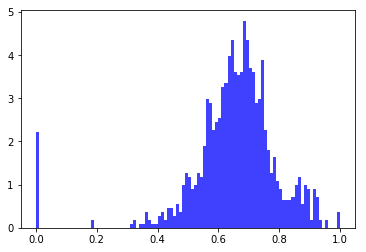

In [147]:
from matplotlib import pyplot as plt
plt.hist(D, 100, normed=1, facecolor='blue', alpha=0.75)
plt.show()